In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

%matplotlib inline
sns.set(color_codes=True)

In [2]:
mydata = pd.read_csv("Data.csv")
mydata.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
mydata.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [4]:
mydata.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
mydata['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

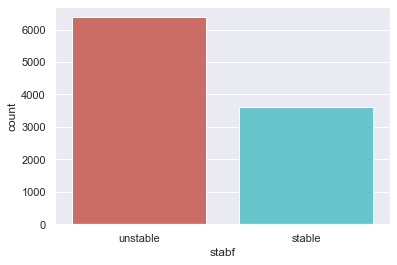

In [6]:
sns.countplot(x= 'stabf', data = mydata, palette = 'hls')
plt.show()

In [7]:
mydata = mydata.drop(columns = 'stab')
mydata.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mydata.stabf = encoder.fit_transform(mydata.stabf)
mydata
#USTABLE = 1, STABLE = 0

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


In [9]:
X = mydata.drop(columns='stabf')
y = mydata['stabf']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

1    5092
0    2908
Name: stabf, dtype: int64

In [11]:
y_test.value_counts()

1    1288
0     712
Name: stabf, dtype: int64

In [12]:
scaler = StandardScaler()
x_trainsc = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_testsc = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

# LOGISTIC REGRESSION

In [13]:
model = LogisticRegression(random_state = 1)
model.fit(x_trainsc, y_train)
y_logpred = model.predict(x_testsc)
y_logpred_proba = model.predict_proba(x_testsc)[::, 1]

In [14]:
print("Accuracy: {}%".format(round(model.score(x_testsc, y_test)*100), 2))

Accuracy: 80.0%


In [15]:
#confusion matrix
confm = confusion_matrix(y_test, y_logpred, labels = [1, 0])
print(confm)

[[1114  174]
 [ 218  494]]


In [16]:
print(classification_report(y_test, y_logpred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72       712
           1       0.84      0.86      0.85      1288

    accuracy                           0.80      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.80      0.80      0.80      2000



In [17]:
precision = precision_score(y_test, y_logpred, pos_label = 0)
print( 'Precision: {}%'.format(round(precision*100), 2))
#for stable

Precision: 74.0%


In [18]:
recall = recall_score(y_test, y_logpred, pos_label = 0)
print( 'Recall: {}%'.format(round(recall*100), 2))
#for stable

Recall: 69.0%


In [19]:
f1 = f1_score(y_test, y_logpred, pos_label= 0 )
print( 'F1 Score: {}%'.format(round(f1*100), 2))
#For Stable

F1 Score: 72.0%


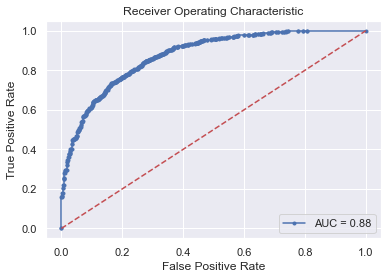

In [20]:
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_logpred_proba)
precision, recall, threshold=precision_recall_curve(y_test, y_logpred_proba)
roc_auc = metrics.roc_auc_score(y_test, y_logpred_proba)
pr_re_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, marker='.', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


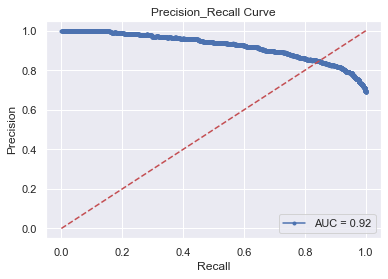

In [21]:
plt.plot(recall, precision, marker='.', label='AUC = %0.2f' % pr_re_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.title('Precision_Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Random Forest Classification

In [22]:
Radmodel= RandomForestClassifier(random_state = 1)
Radmodel.fit(x_trainsc, y_train)

RandomForestClassifier(random_state=1)

In [23]:
y_pred = Radmodel.predict(x_testsc)
y_pred_proba = Radmodel.predict_proba(x_testsc)[::,1]

In [24]:
print("Accuracy: {}%".format(round(Radmodel.score(x_testsc, y_test)*100), 2))

Accuracy: 93.0%


In [25]:
a = Radmodel.score(x_testsc, y_test)
print(a.round(4))

0.929


In [26]:
#confusion matrix
confm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(confm)

[[1233   55]
 [  87  625]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       712
           1       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [28]:
precision = precision_score(y_test, y_pred, pos_label = 0)
print( 'Precision: {}%'.format(round(precision*100), 2))
#for stable

Precision: 92.0%


In [29]:
recall = recall_score(y_test, y_pred, pos_label = 0)
print( 'Recall: {}%'.format(round(recall*100), 2))
#for stable

Recall: 88.0%


In [30]:
f1 = f1_score(y_test, y_pred, pos_label= 0 )
print( 'F1 Score: {}%'.format(round(f1*100), 2))
#For Stable

F1 Score: 90.0%


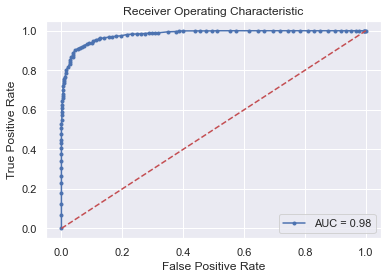

In [31]:
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
precision, recall, threshold=precision_recall_curve(y_test, y_pred_proba)
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
pr_re_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, marker='.', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


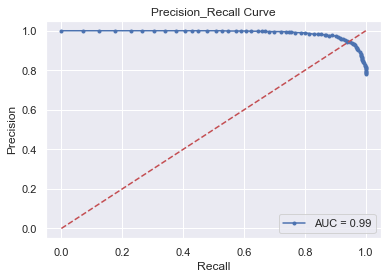

In [32]:
plt.plot(recall, precision, marker='.', label='AUC = %0.2f' % pr_re_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.title('Precision_Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# XGBRFClassifier

In [33]:
#XGBOOST with Random Forest classifier
XGBRFmodel = XGBRFClassifier(random_state = 1)
XGBRFmodel.fit(x_trainsc, y_train)
y_XGBRFpred = XGBRFmodel.predict(x_testsc)
y_XGBRFpred_proba = XGBRFmodel.predict_proba(x_testsc)[:,1]


In [34]:
acc = accuracy_score(y_test, y_XGBRFpred)
print("Accuracy: {}%".format(round(acc*100), 2))

Accuracy: 87.0%


In [35]:
precision = precision_score(y_test, y_XGBRFpred, pos_label = 0)
print( 'Precision: {}%'.format(round(precision*100), 2))
#for stable

Precision: 87.0%


In [36]:
recall = recall_score(y_test, y_XGBRFpred, pos_label = 0)
print( 'Recall: {}%'.format(round(recall*100), 2))
#for stable

Recall: 76.0%


In [37]:
f1 = f1_score(y_test, y_XGBRFpred, pos_label= 0 )
print( 'F1 Score: {}%'.format(round(f1*100), 2))
#For Stable

F1 Score: 81.0%


In [38]:
print(classification_report(y_test, y_XGBRFpred))
print("XGBRFclassification report")

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       712
           1       0.88      0.94      0.91      1288

    accuracy                           0.87      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.87      0.87      0.87      2000

XGBRFclassification report


In [39]:
#confusion matrix
confm = confusion_matrix(y_test, y_XGBRFpred, labels = [1, 0])
print(confm)

[[1208   80]
 [ 171  541]]


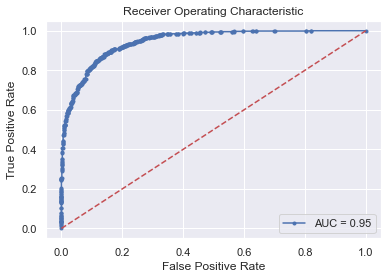

In [40]:
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_XGBRFpred_proba)
precision, recall, threshold=precision_recall_curve(y_test, y_XGBRFpred_proba)
roc_auc = metrics.roc_auc_score(y_test, y_XGBRFpred_proba)
pr_re_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, marker='.', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


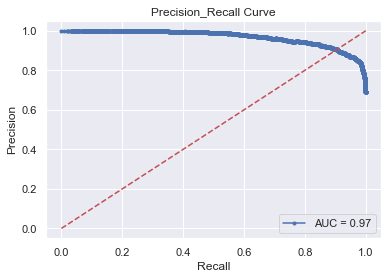

In [41]:
plt.plot(recall, precision, marker='.', label='AUC = %0.2f' % pr_re_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.title('Precision_Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# XGBOOSTClassifier

In [42]:
xmodel = XGBClassifier(random_state = 1)
xmodel.fit(x_trainsc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_XGBpred = xmodel.predict(x_testsc)
y_XGBpred_proba = xmodel.predict_proba(x_testsc)[::,1]

In [44]:
accx = accuracy_score(y_test, y_XGBpred)
print("Accuracy: {}%".format(round(acc*100), 2))

Accuracy: 87.0%


In [45]:
accxy = accuracy_score(y_test, y_XGBpred)
print(accxy)

0.9455


In [46]:
precision = precision_score(y_test, y_XGBpred, pos_label = 0)
print( 'Precision: {}%'.format(round(precision*100), 2))
#for stable

Precision: 94.0%


In [47]:
recall = recall_score(y_test, y_XGBpred, pos_label = 0)
print( 'Recall: {}%'.format(round(recall*100), 2))
#for stable

Recall: 91.0%


In [48]:
f1 = f1_score(y_test, y_XGBpred, pos_label= 0 )
print( 'F1 Score: {}%'.format(round(f1*100), 2))
#For Stable

F1 Score: 92.0%


In [49]:
print(classification_report(y_test, y_XGBpred))
print("XGBclassification report")

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       712
           1       0.95      0.97      0.96      1288

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000

XGBclassification report


In [50]:
#confusion matrix
confm = confusion_matrix(y_test, y_XGBpred, labels = [1, 0])
print(confm)

[[1243   45]
 [  64  648]]


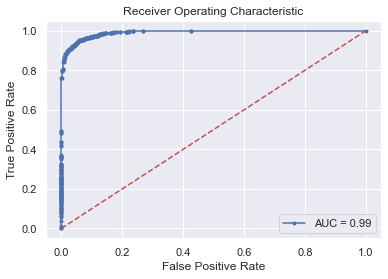

In [51]:
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_XGBpred_proba)
precision, recall, threshold=precision_recall_curve(y_test, y_XGBpred_proba)
roc_auc = metrics.roc_auc_score(y_test, y_XGBpred_proba)
pr_re_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, marker='.', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


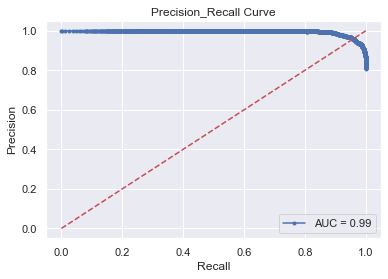

In [52]:
plt.plot(recall, precision, marker='.', label='AUC = %0.2f' % pr_re_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.title('Precision_Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# LIGHTGBM

In [53]:
lgbmodel= LGBMClassifier(random_state = 1)
lgbmodel.fit(x_trainsc, y_train)

LGBMClassifier(random_state=1)

In [54]:
y_Lpred = lgbmodel.predict(x_testsc)

In [55]:
acc = accuracy_score(y_test, y_Lpred)
print("Accuracy: {}%".format(round(acc*100), 2))

Accuracy: 94.0%


In [56]:
accl = accuracy_score(y_test, y_Lpred)
print(accl.round(4))

0.9375


In [57]:
precision = precision_score(y_test, y_Lpred, pos_label = 0)
print( 'Precision: {}%'.format(round(precision*100), 2))
#for stable

Precision: 93.0%


In [58]:
recall = recall_score(y_test, y_Lpred, pos_label = 0)
print( 'Recall: {}%'.format(round(recall*100), 2))
#for stable

Recall: 89.0%


In [59]:
f1 = f1_score(y_test, y_Lpred, pos_label= 0 )
print( 'F1 Score: {}%'.format(round(f1*100), 2))
#For Stable

F1 Score: 91.0%


In [60]:
#confusion matrix
confm = confusion_matrix(y_test, y_Lpred, labels = [1, 0])
print(confm)

[[1240   48]
 [  77  635]]


In [61]:
print(classification_report(y_test, y_Lpred))
print("LGBclassification report")

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       712
           1       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

LGBclassification report


# Extra Tree Classifier

In [62]:
Etree = ExtraTreesClassifier(random_state=1, n_estimators = 5, criterion ='entropy', max_features = 2)
Etree.fit(x_trainsc, y_train)
y_treepred = Etree.predict(x_testsc)

In [63]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split, 'max_features': max_features}

In [65]:
RSCV = RandomizedSearchCV(Etree, hyperparameter_grid, random_state=1)
find = RSCV.fit(x_trainsc, y_train)
find.best_params_.values()

dict_values([1000, 2, 8, None])

In [66]:
Etree_p = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=8, random_state=1)
Etree_p.fit(x_trainsc, y_train)
y_Etree_p_pred = Etree_p.predict(x_testsc)

In [67]:
#Extra tree without RandomizedSearchCV
acc = accuracy_score(y_test, y_treepred)
print("Accuracy: {}%".format(round(acc*100), 2))

Accuracy: 82.0%


In [68]:
#Extra tree with RandomizedSearchCV
acc = accuracy_score(y_test, y_Etree_p_pred)
print("Accuracy: {}%".format(round(acc*100), 2))

Accuracy: 91.0%


In [69]:
precision = precision_score(y_test, y_Etree_p_pred, pos_label = 0)
print( 'Precision: {}%'.format(round(precision*100), 2))
#for stable

Precision: 98.0%


In [70]:
recall = recall_score(y_test, y_Etree_p_pred, pos_label = 0)
print( 'Recall: {}%'.format(round(recall*100), 2))
#for stable

Recall: 77.0%


In [71]:
f1 = f1_score(y_test, y_Etree_p_pred, pos_label= 0 )
print( 'F1 Score: {}%'.format(round(f1*100), 2))
#For Stable

F1 Score: 86.0%


In [72]:
print(classification_report(y_test, y_Etree_p_pred))
print("Extra Tree classification report")

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       712
           1       0.88      0.99      0.93      1288

    accuracy                           0.91      2000
   macro avg       0.93      0.88      0.90      2000
weighted avg       0.92      0.91      0.91      2000

Extra Tree classification report


In [73]:
#confusion matrix
confm = confusion_matrix(y_test, y_Etree_p_pred, labels = [1, 0])
print(confm)

[[1275   13]
 [ 166  546]]


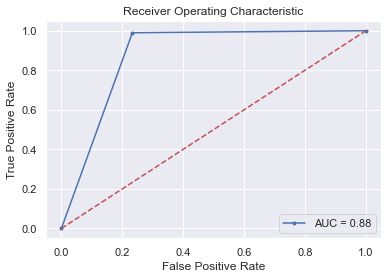

In [74]:
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_Etree_p_pred)
precision, recall, threshold=precision_recall_curve(y_test, y_Etree_p_pred)
roc_auc = metrics.roc_auc_score(y_test, y_Etree_p_pred)
pr_re_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, marker='.', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


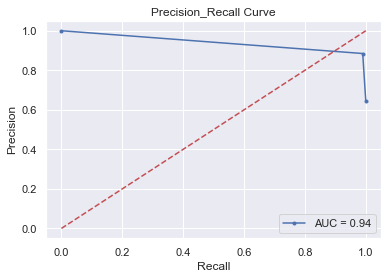

In [75]:
plt.plot(recall, precision, marker='.', label='AUC = %0.2f' % pr_re_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.title('Precision_Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [83]:
feature_importance = Etree_p.feature_importances_ 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in Etree_p.estimators_], axis = 0)

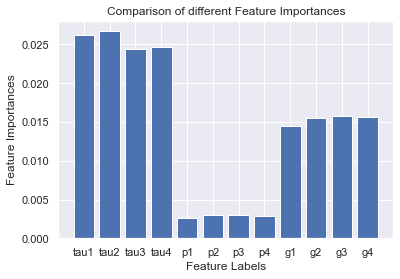

In [84]:
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 